<a href="https://colab.research.google.com/github/phantomfait/EDA_THEORY_Assisnment/blob/main/EDA_Theory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

file_path = 'melb_data.csv'
data = pd.read_csv(file_path)


data_info = {
    'Dimensions': data.shape,
    'Columns': data.columns.to_list(),
    'Data Types': data.dtypes,
    'Missing Values': data.isnull().sum(),
    'Data Summary': data.describe(include='all')
}


for key, value in data_info.items():
    print(f"\n{key}:\n", value)


data['Car'].fillna(data['Car'].median(), inplace=True)


data['BuildingArea'].fillna(data['BuildingArea'].median(), inplace=True)


data['YearBuilt'].fillna(data['YearBuilt'].median(), inplace=True)


data['CouncilArea'].fillna(data['CouncilArea'].mode()[0], inplace=True)


missing_values_after_cleaning = data.isnull().sum()
print("\nMissing Values After Cleaning:\n", missing_values_after_cleaning)




Dimensions:
 (13580, 21)

Columns:
 ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']

Data Types:
 Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

Missing Values:
 Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG       

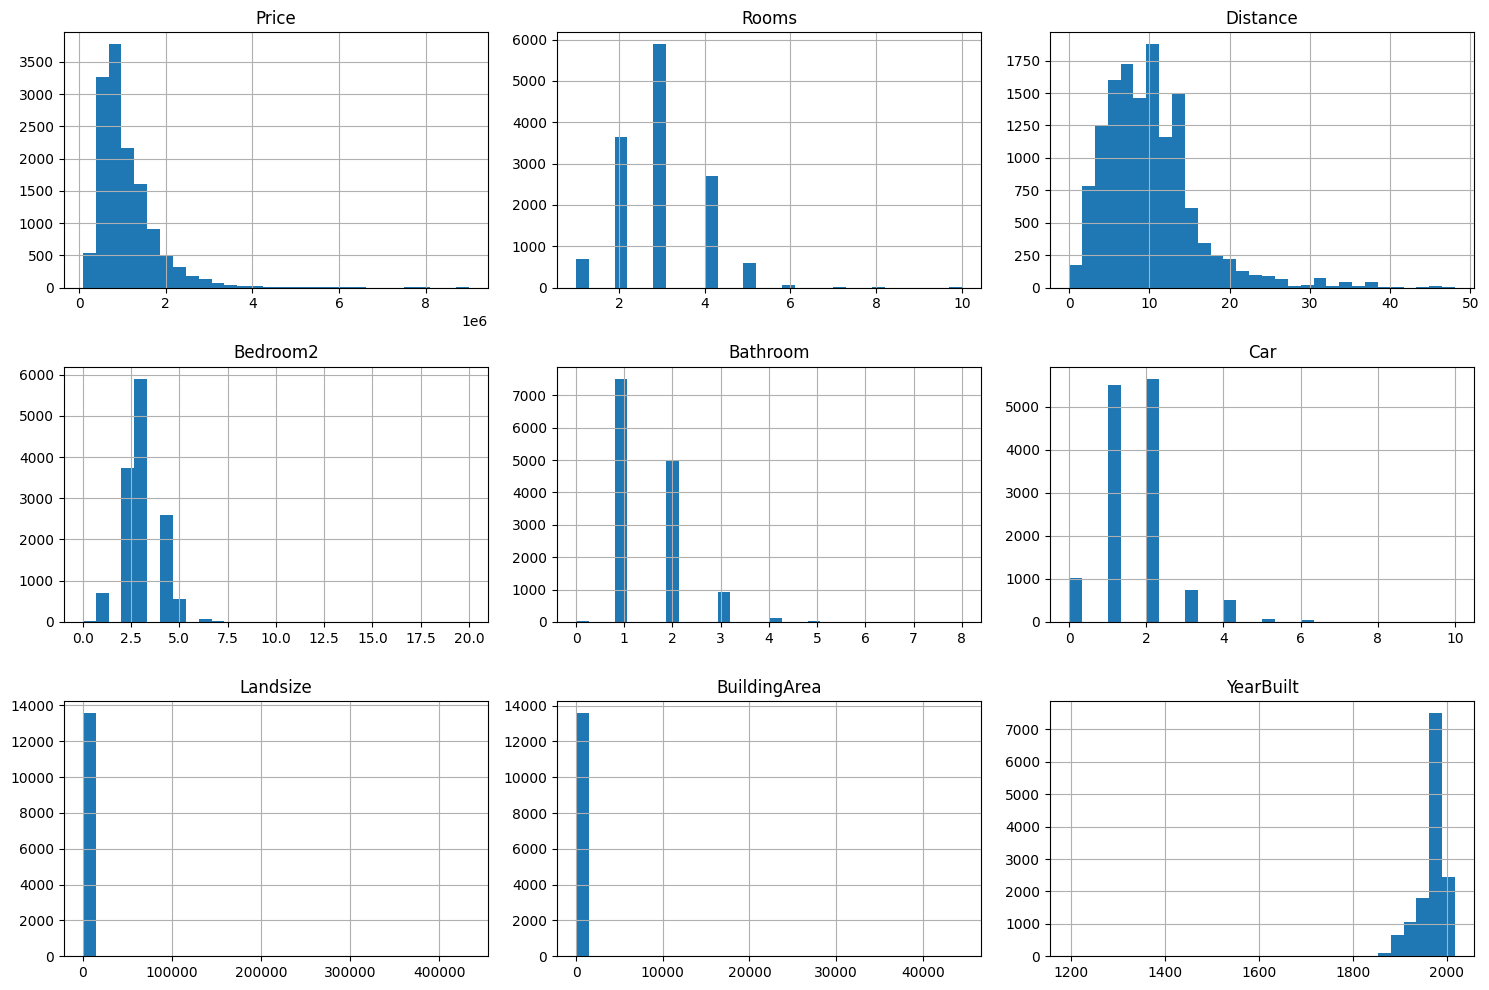

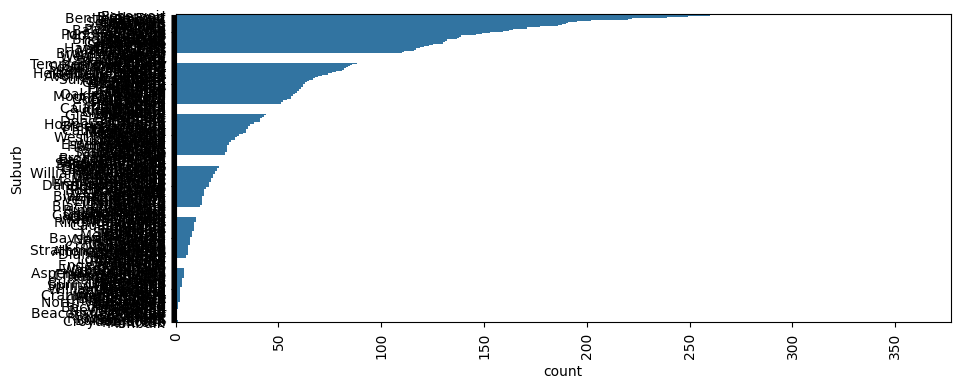

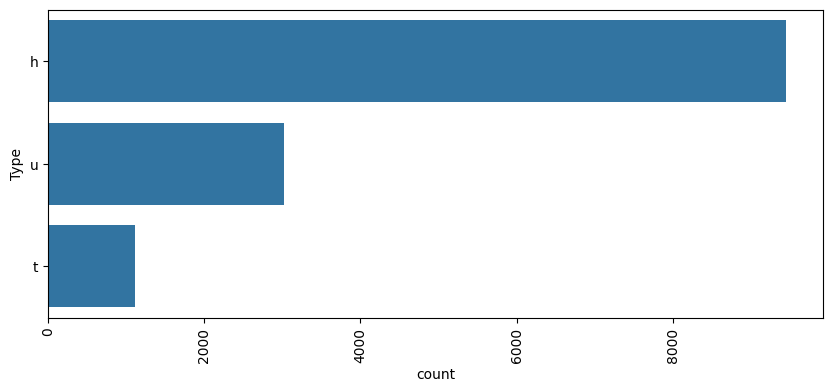

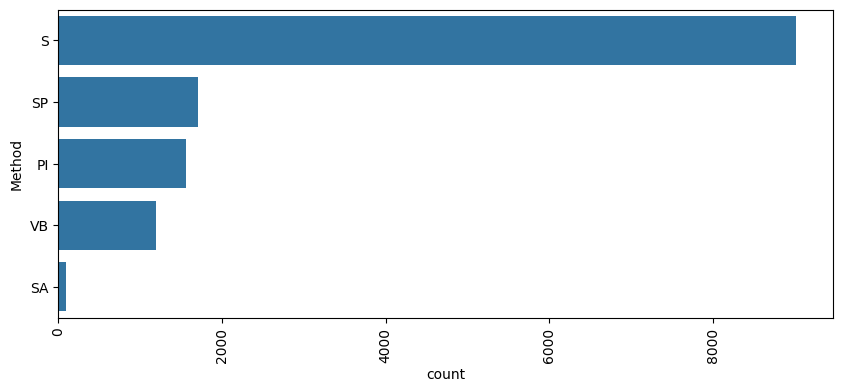

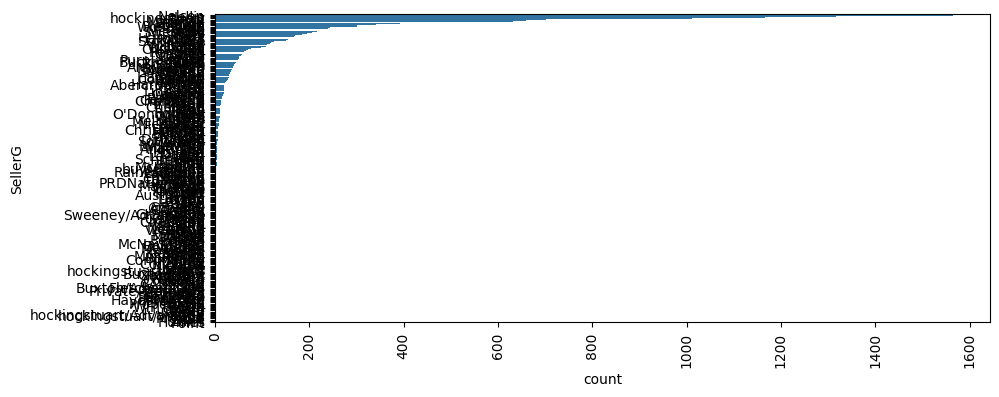

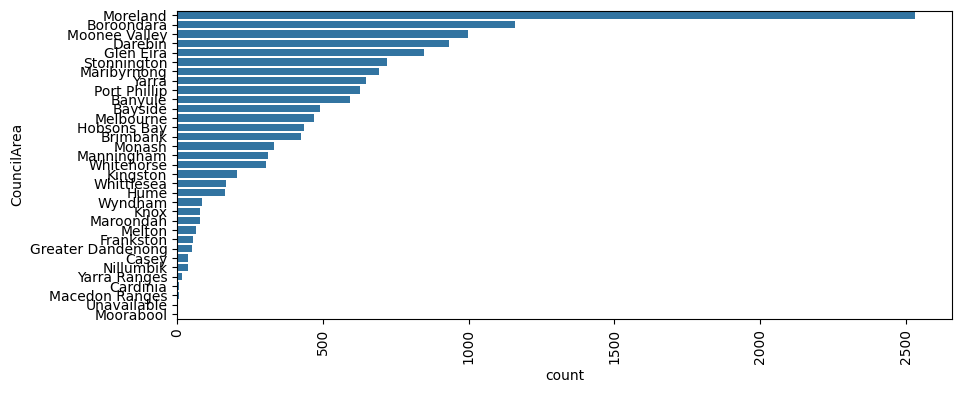

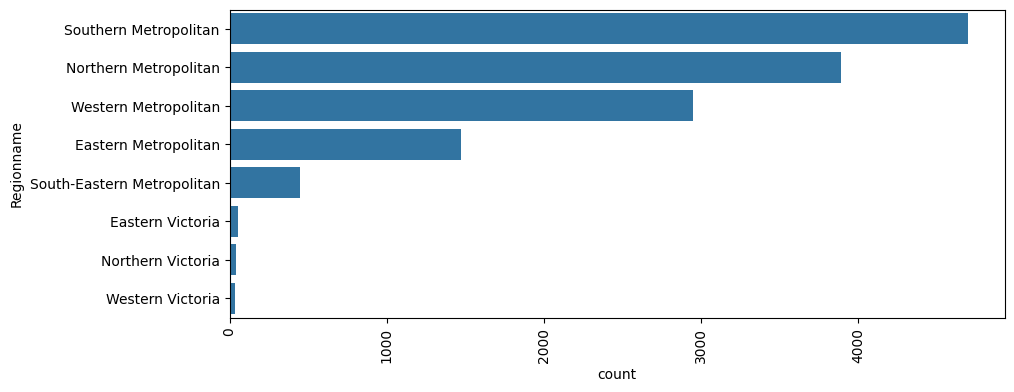

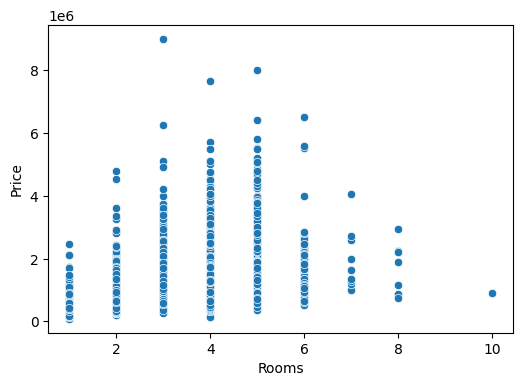

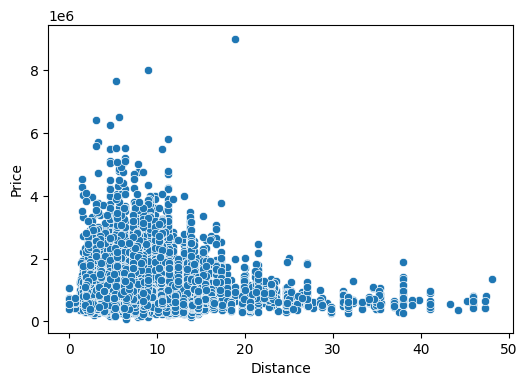

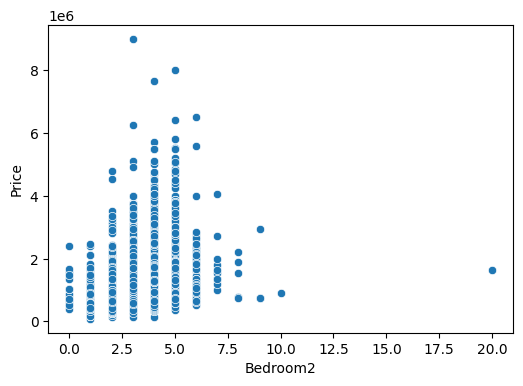

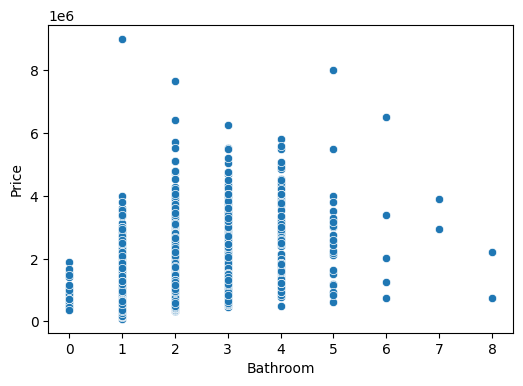

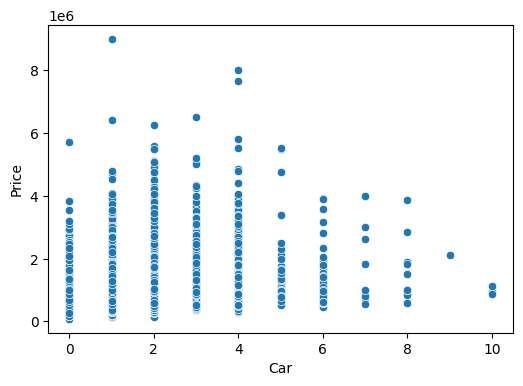

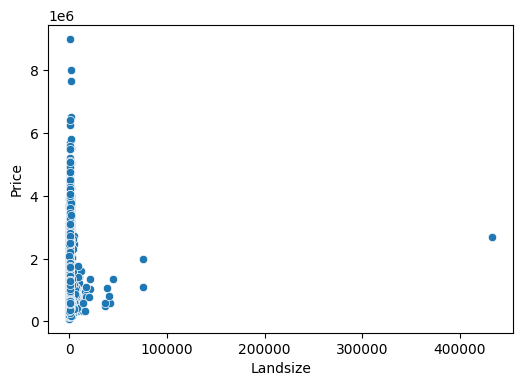

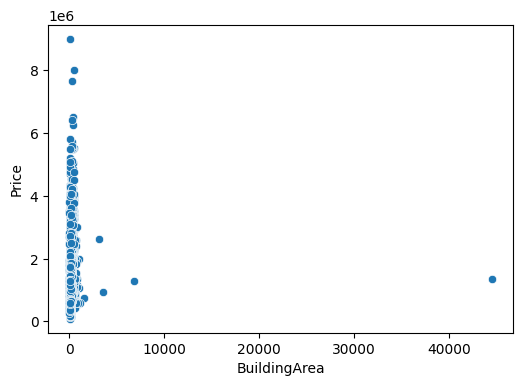

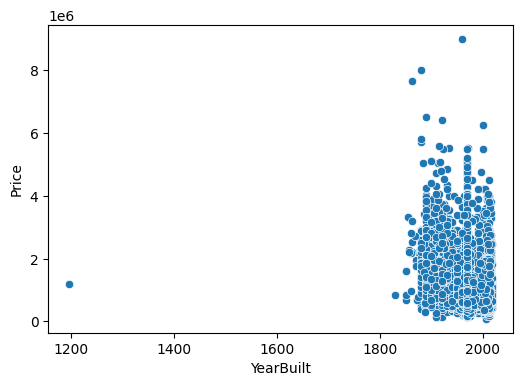

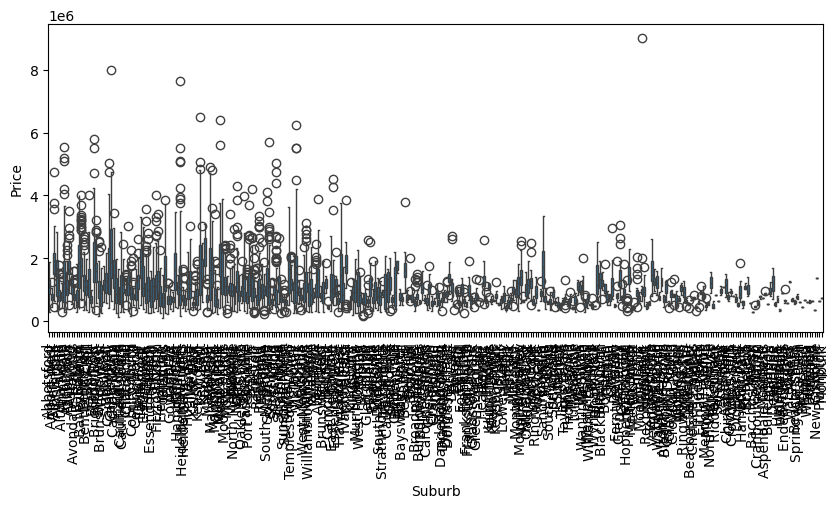

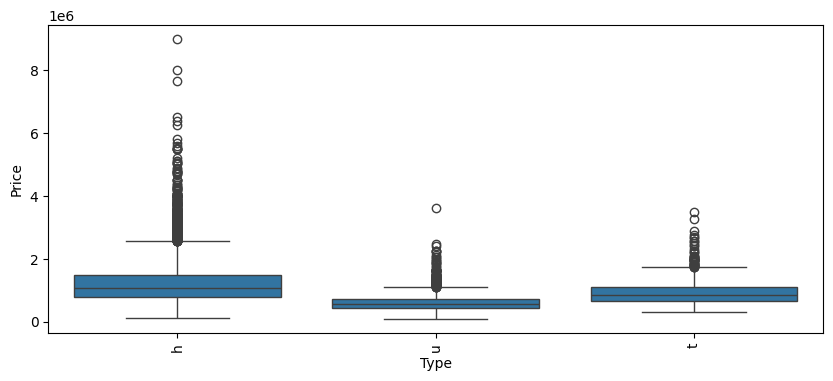

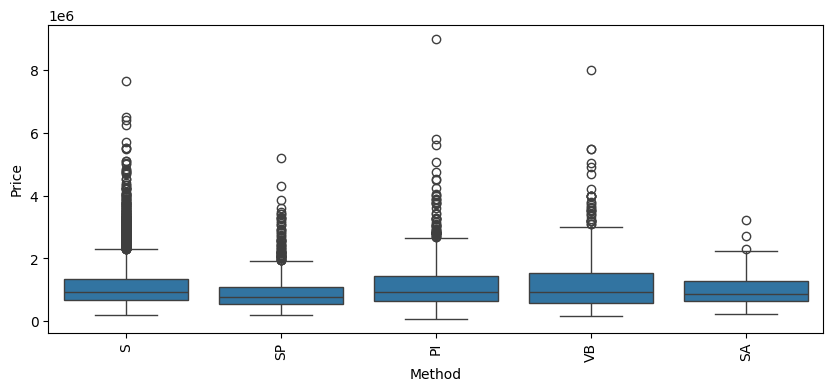

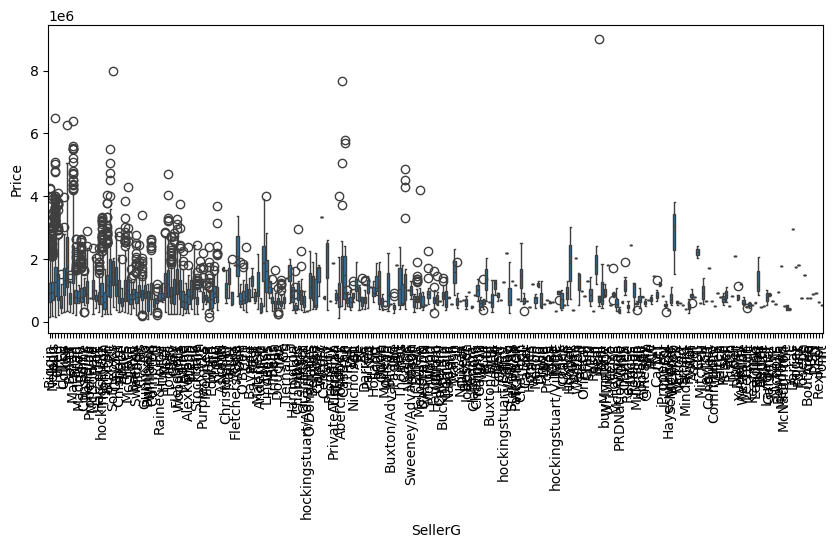

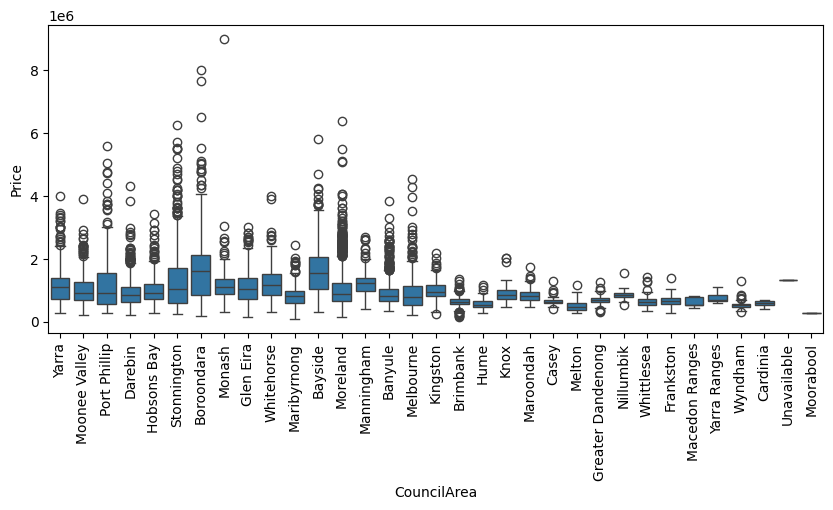

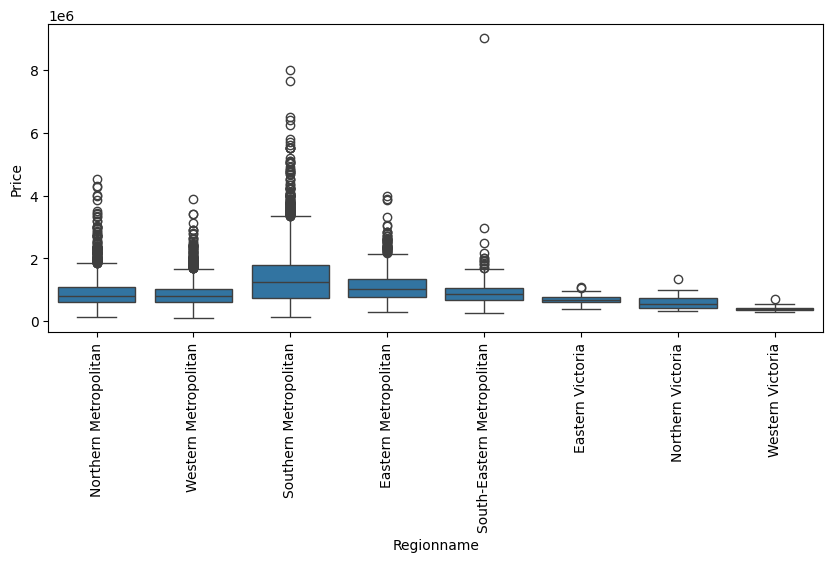

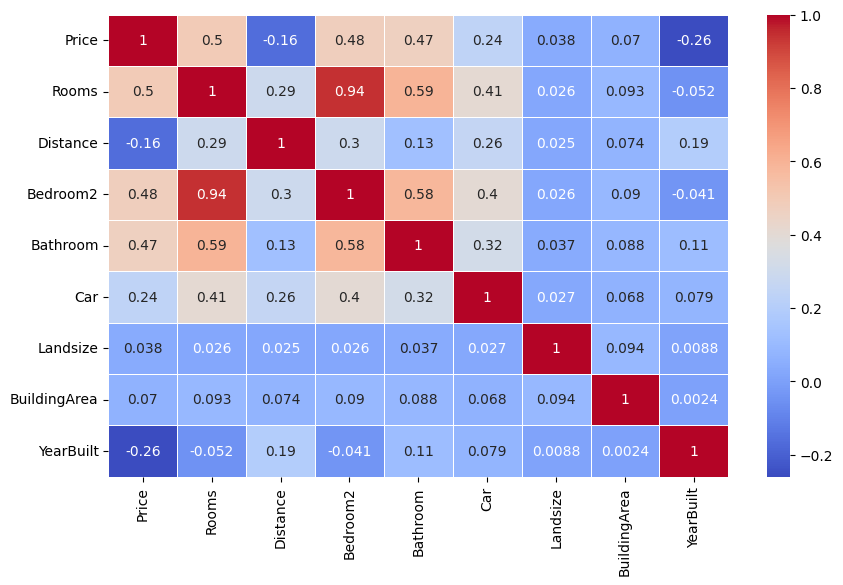

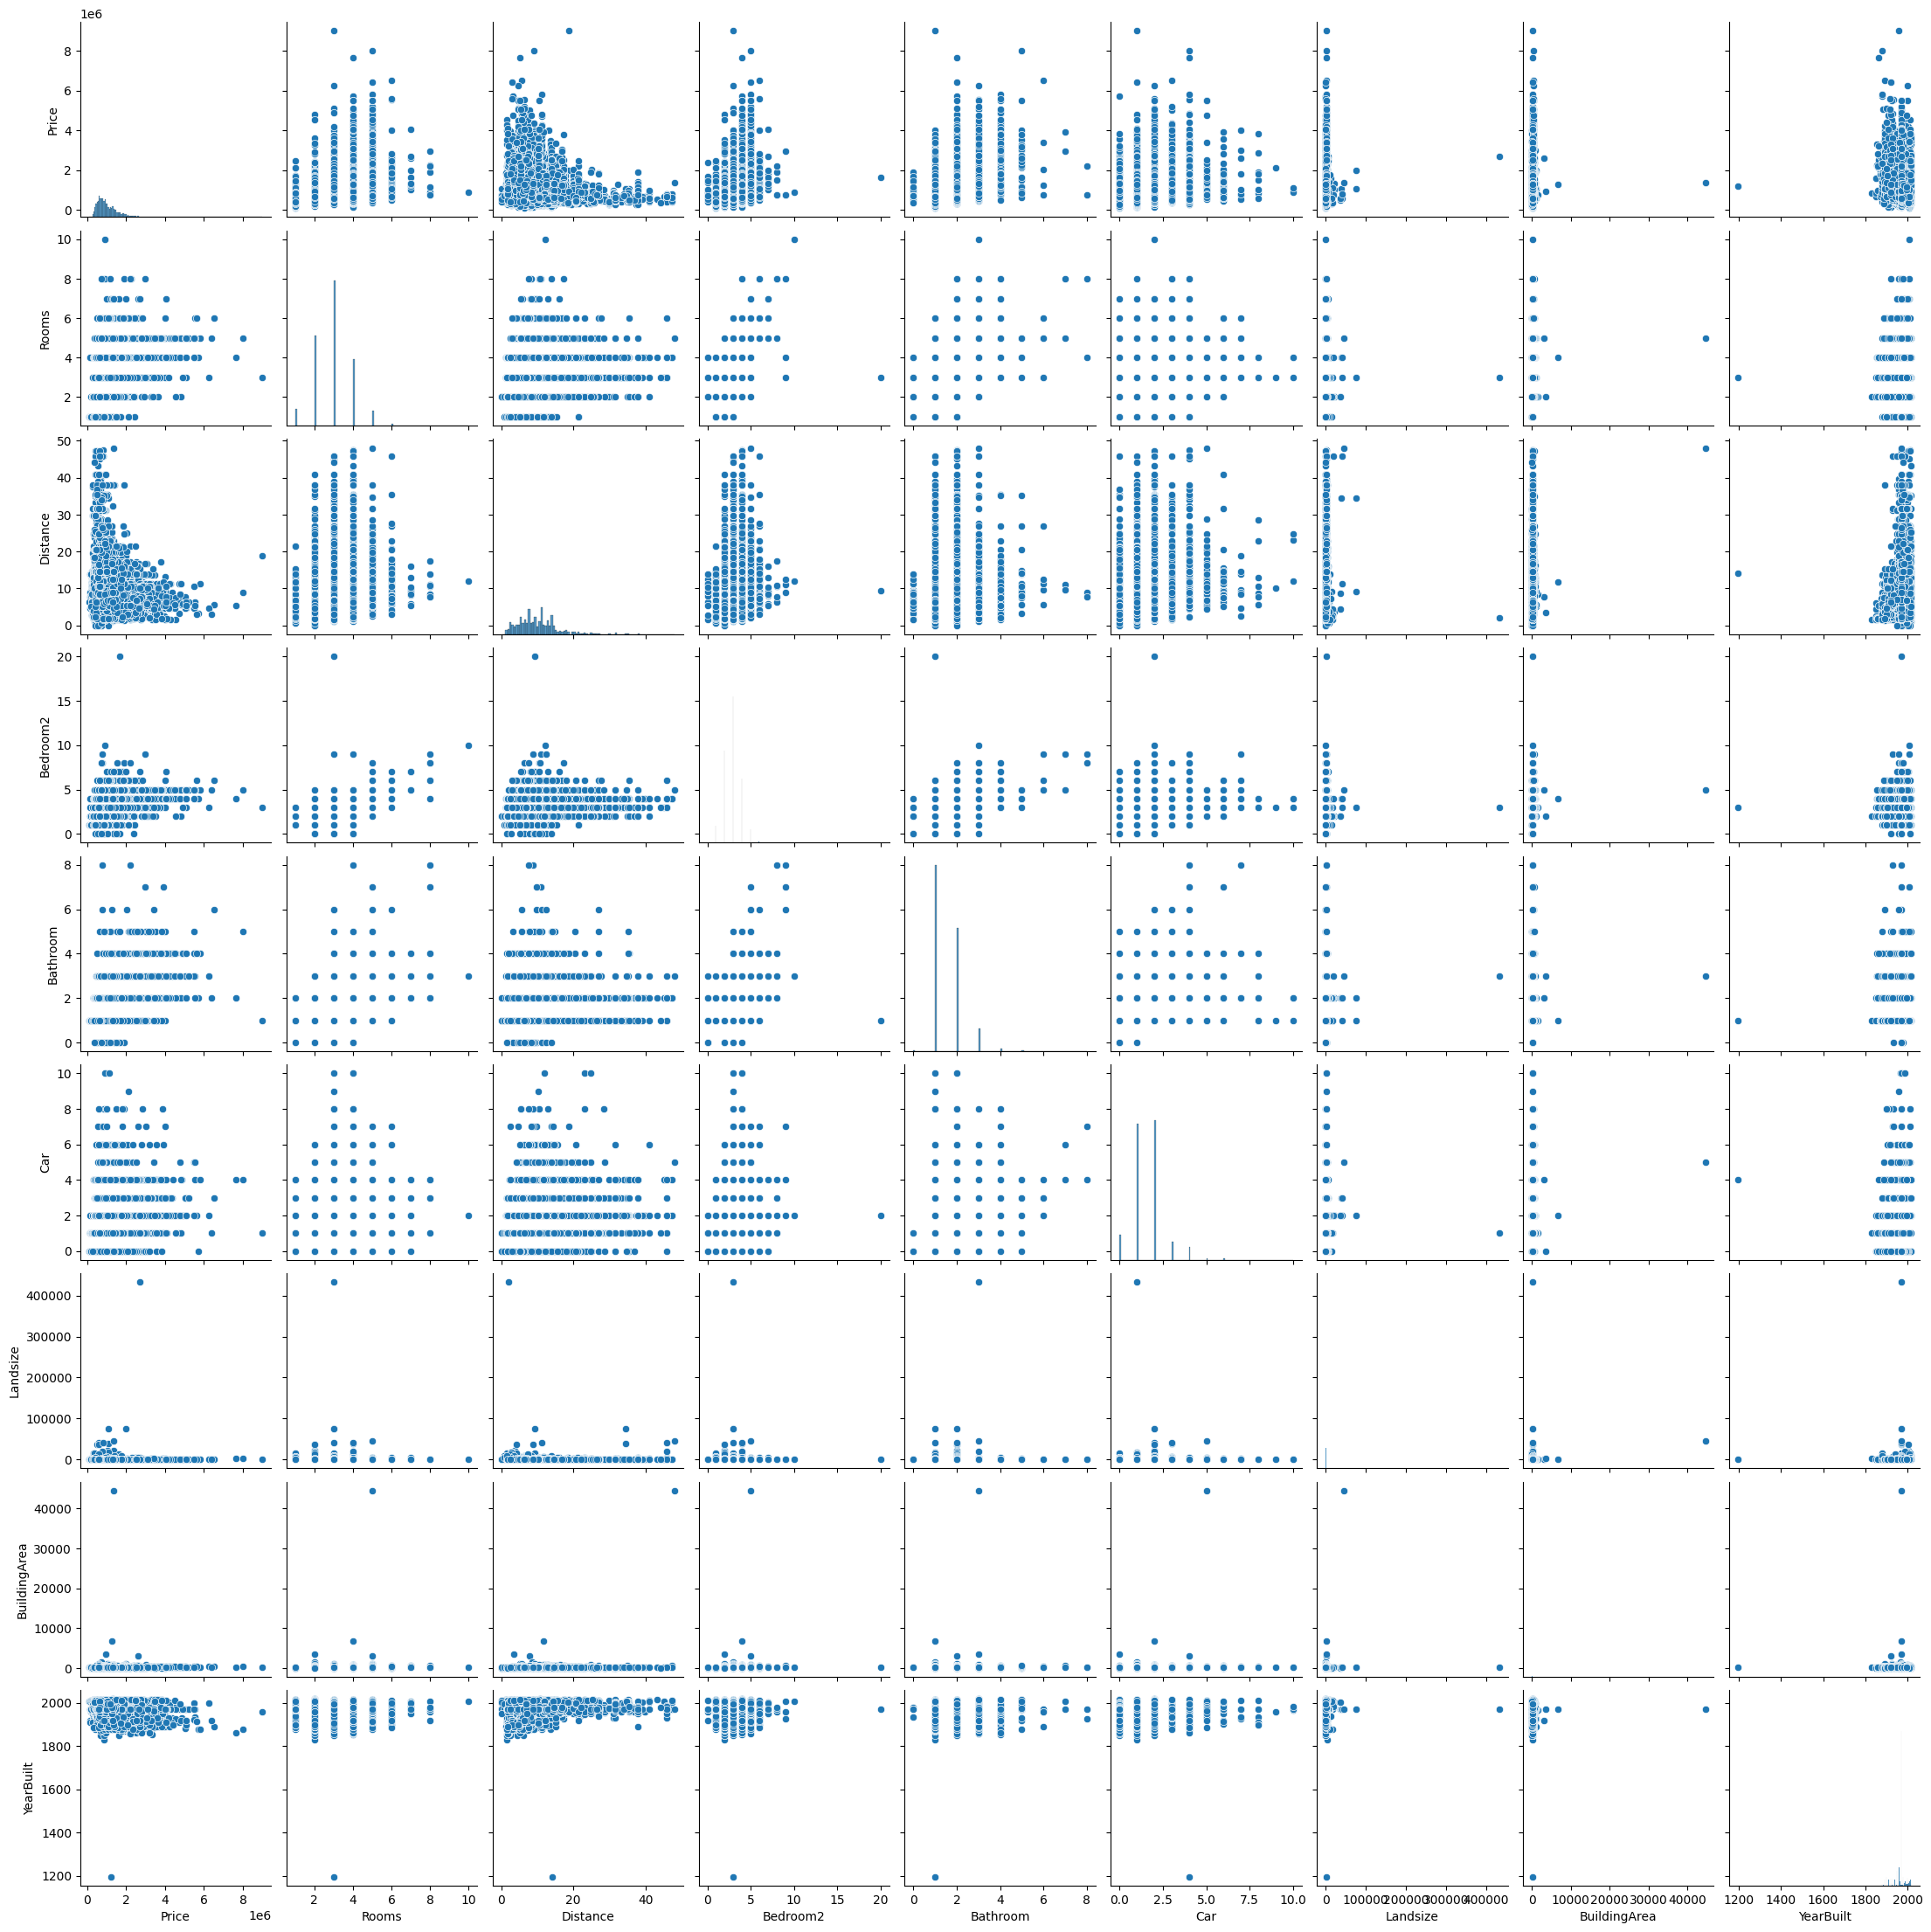

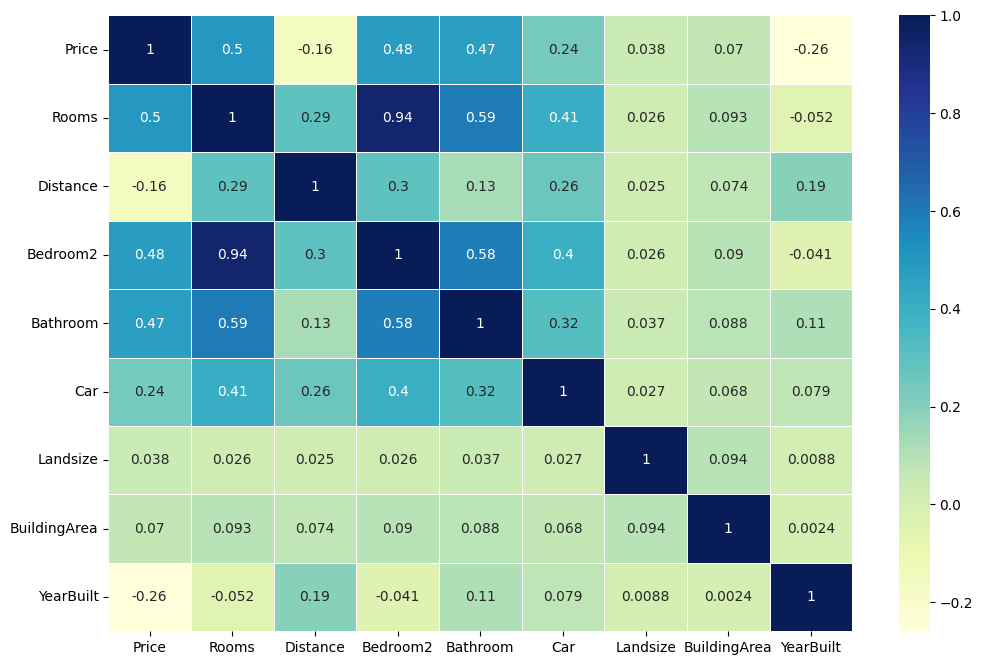

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis
numerical_features = ['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
data[numerical_features].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

categorical_features = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[feature], order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

# Bivariate Analysis
for feature in numerical_features:
    if feature != 'Price':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[feature], y=data['Price'])
        plt.show()

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature], y=data['Price'])
    plt.xticks(rotation=90)
    plt.show()

correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Multivariate Analysis
sns.pairplot(data[numerical_features])
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.show()



--- Price ---
Mean: 1075684.079455081
Median: 903000.0
Mode: 1100000.0
Standard Deviation: 639310.724296018
Min: 85000.0
Max: 9000000.0
25th Percentile: 650000.0
75th Percentile: 1330000.0

--- Rooms ---
Mean: 2.9379970544919
Median: 3.0
Mode: 3
Standard Deviation: 0.9557479384215551
Min: 1
Max: 10
25th Percentile: 2.0
75th Percentile: 3.0

--- Distance ---
Mean: 10.13777614138439
Median: 9.2
Mode: 11.2
Standard Deviation: 5.868724943071711
Min: 0.0
Max: 48.1
25th Percentile: 6.1
75th Percentile: 13.0

--- Bedroom2 ---
Mean: 2.9147275405007362
Median: 3.0
Mode: 3.0
Standard Deviation: 0.9659210617084282
Min: 0.0
Max: 20.0
25th Percentile: 2.0
75th Percentile: 3.0

--- Bathroom ---
Mean: 1.5342415316642122
Median: 1.0
Mode: 1.0
Standard Deviation: 0.6917117224588402
Min: 0.0
Max: 8.0
25th Percentile: 1.0
75th Percentile: 2.0

--- Car ---
Mean: 1.6118556701030928
Median: 2.0
Mode: 2.0
Standard Deviation: 0.960793055789703
Min: 0.0
Max: 10.0
25th Percentile: 1.0
75th Percentile: 2.0

---

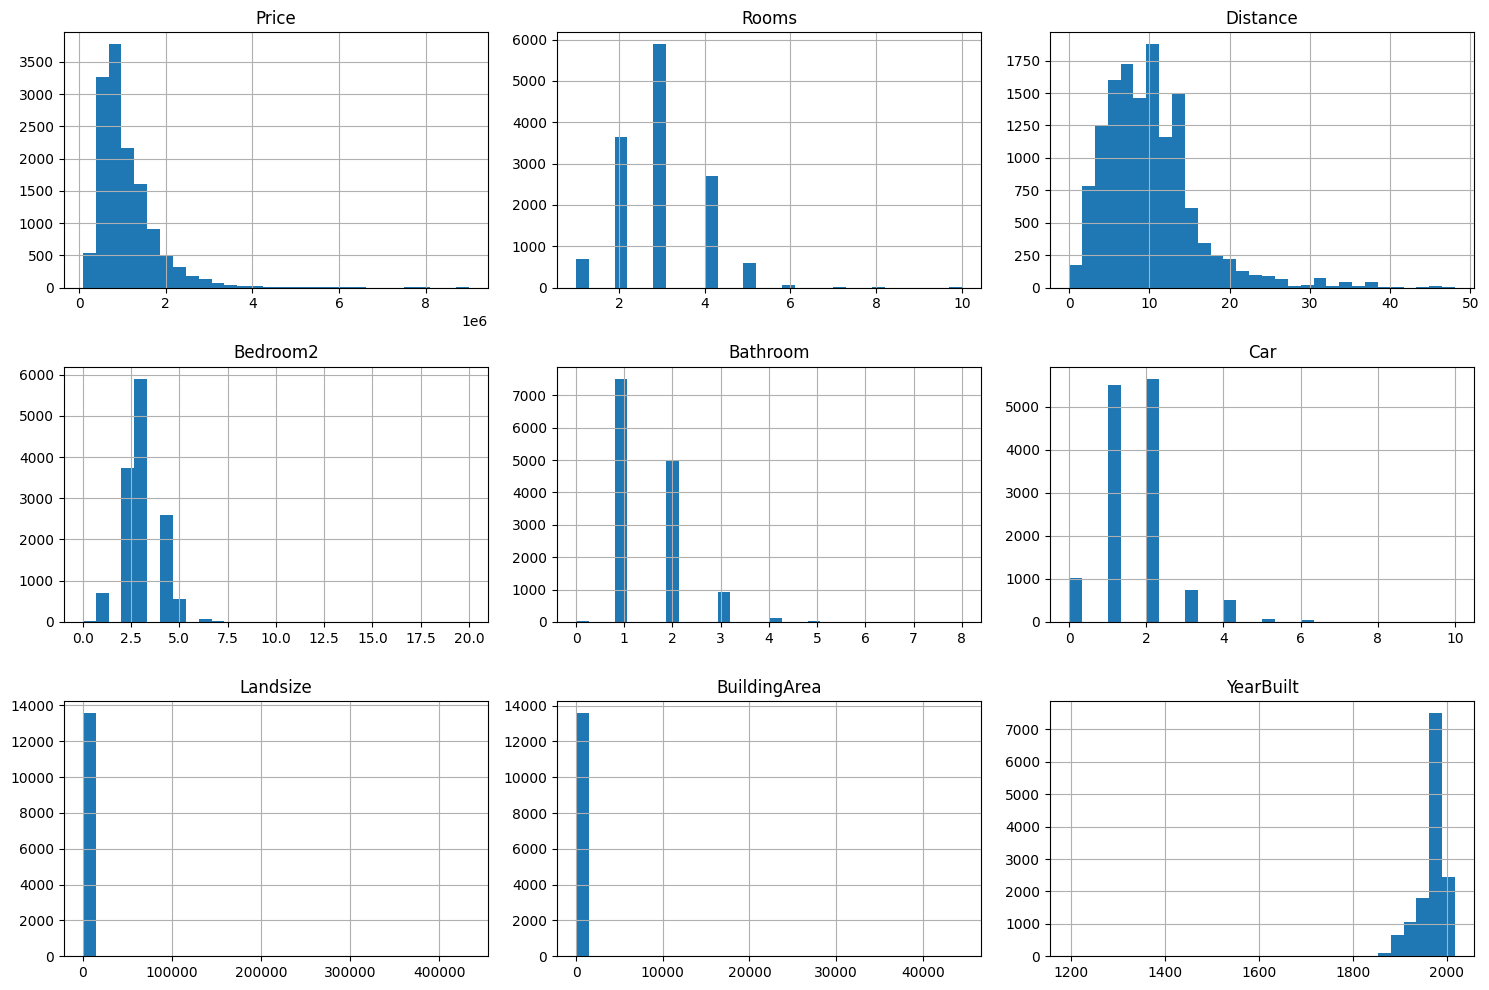


--- Suburb ---
Mode: Reservoir
Unique Values: 314
Value Counts:
Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
Name: count, dtype: int64


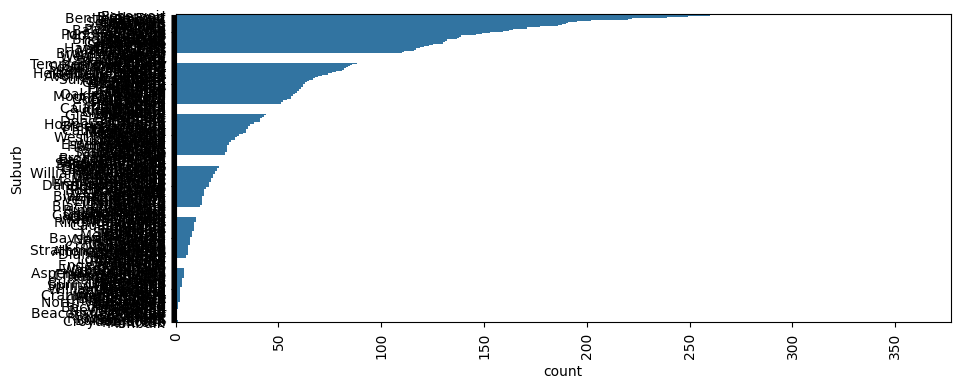


--- Type ---
Mode: h
Unique Values: 3
Value Counts:
Type
h    9449
u    3017
t    1114
Name: count, dtype: int64


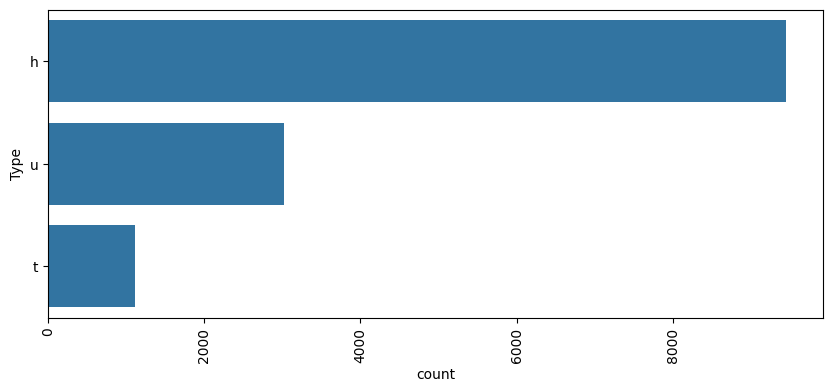


--- Method ---
Mode: S
Unique Values: 5
Value Counts:
Method
S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: count, dtype: int64


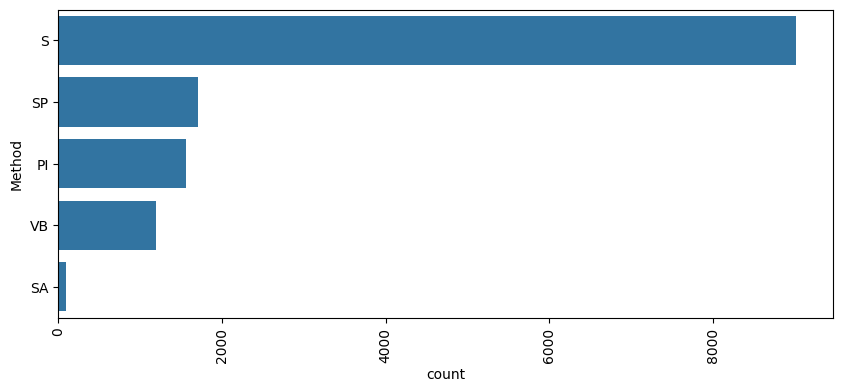


--- SellerG ---
Mode: Nelson
Unique Values: 268
Value Counts:
SellerG
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
Name: count, dtype: int64


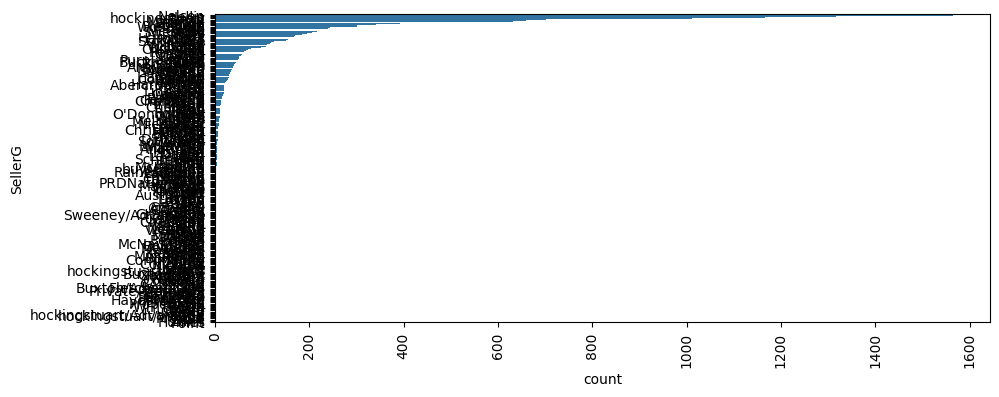


--- CouncilArea ---
Mode: Moreland
Unique Values: 33
Value Counts:
CouncilArea
Moreland         2532
Boroondara       1160
Moonee Valley     997
Darebin           934
Glen Eira         848
Name: count, dtype: int64


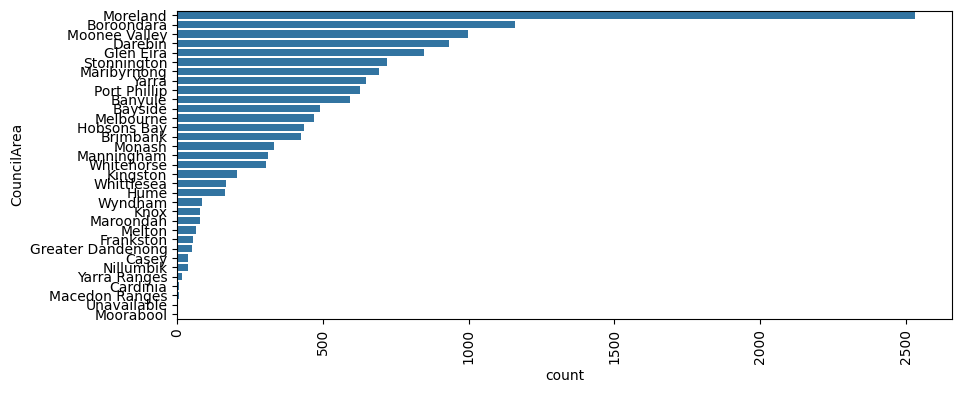


--- Regionname ---
Mode: Southern Metropolitan
Unique Values: 8
Value Counts:
Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Name: count, dtype: int64


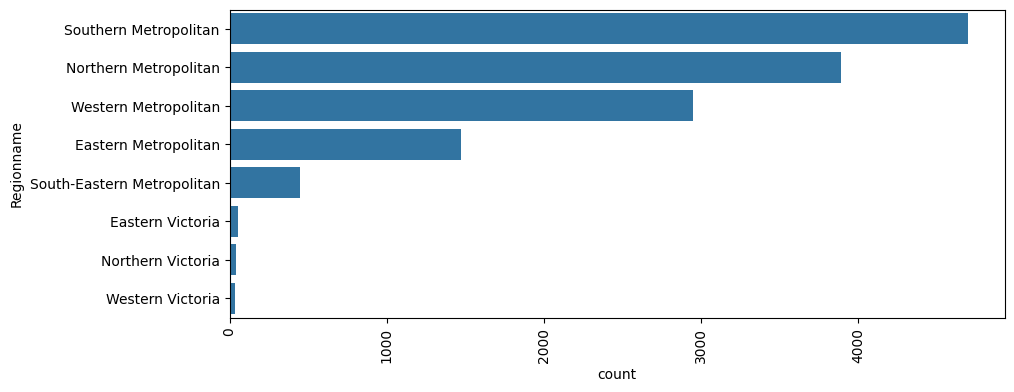


--- Price vs Rooms ---
          Price     Rooms
Price  1.000000  0.496634
Rooms  0.496634  1.000000


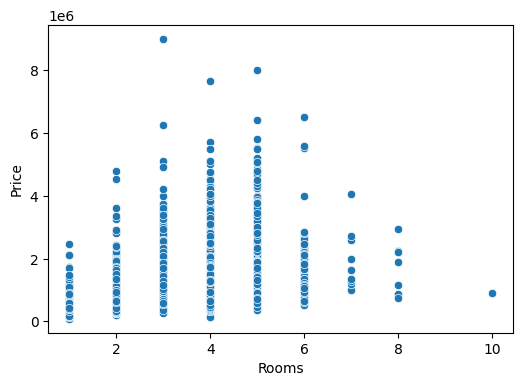


--- Price vs Distance ---
             Price  Distance
Price     1.000000 -0.162522
Distance -0.162522  1.000000


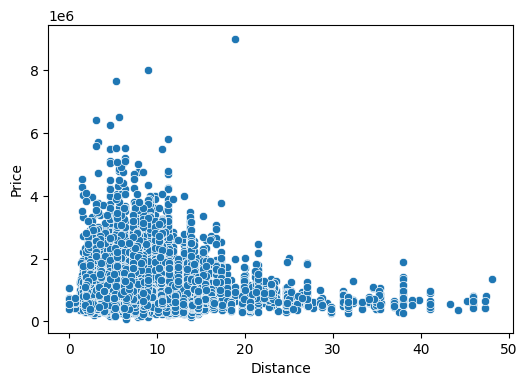


--- Price vs Bedroom2 ---
             Price  Bedroom2
Price     1.000000  0.475951
Bedroom2  0.475951  1.000000


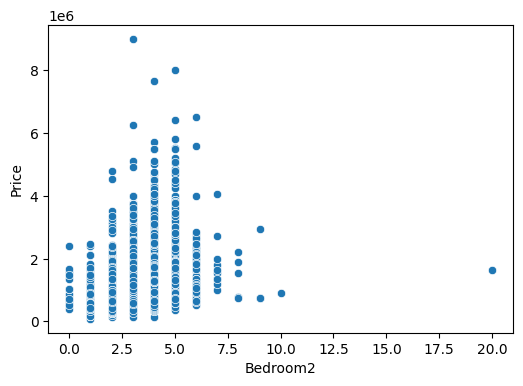


--- Price vs Bathroom ---
             Price  Bathroom
Price     1.000000  0.467038
Bathroom  0.467038  1.000000


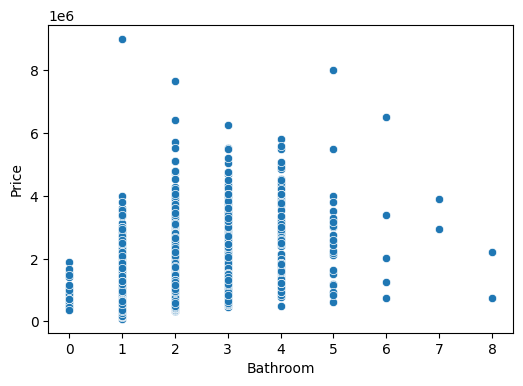


--- Price vs Car ---
          Price       Car
Price  1.000000  0.239109
Car    0.239109  1.000000


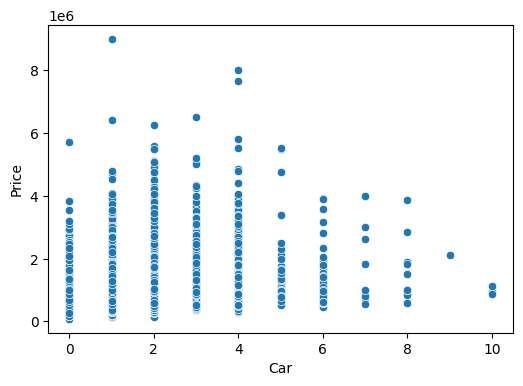


--- Price vs Landsize ---
             Price  Landsize
Price     1.000000  0.037507
Landsize  0.037507  1.000000


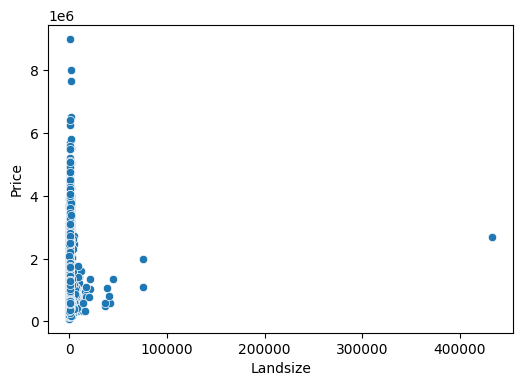


--- Price vs BuildingArea ---
                 Price  BuildingArea
Price         1.000000      0.069763
BuildingArea  0.069763      1.000000


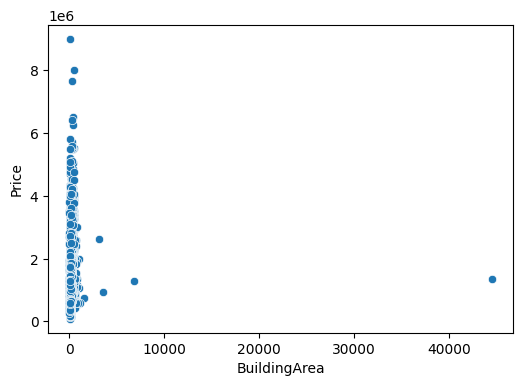


--- Price vs YearBuilt ---
              Price  YearBuilt
Price      1.000000  -0.259387
YearBuilt -0.259387   1.000000


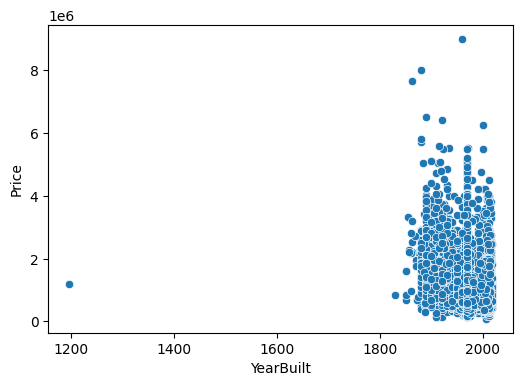

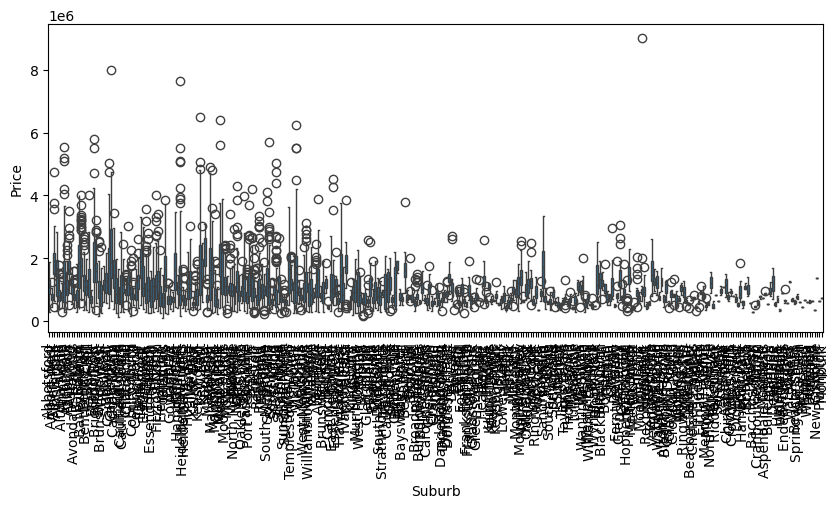

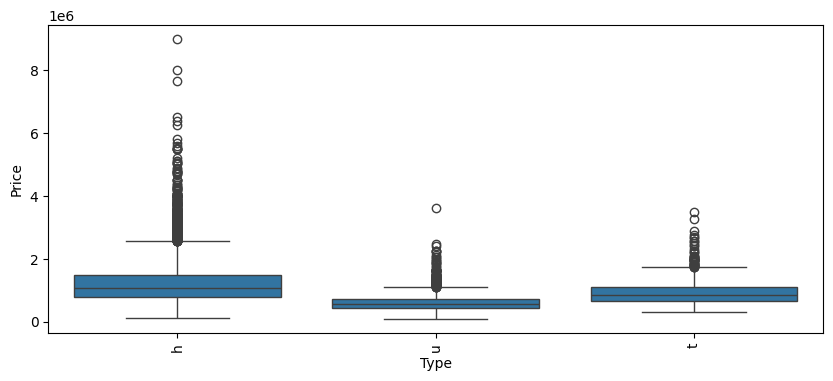

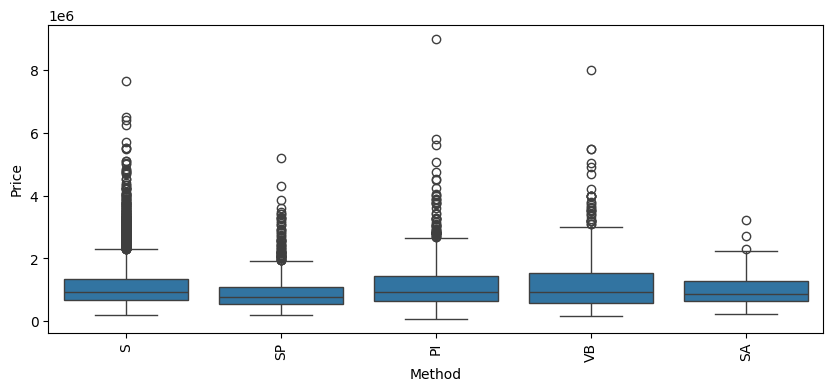

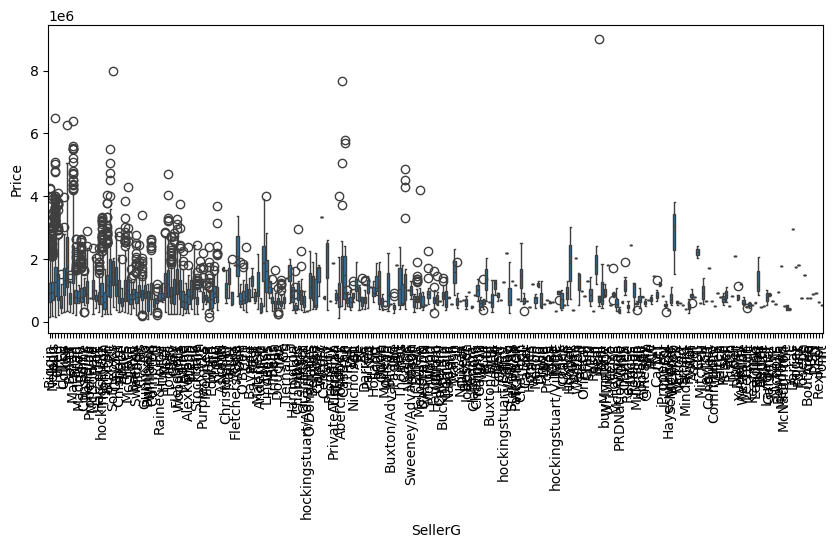

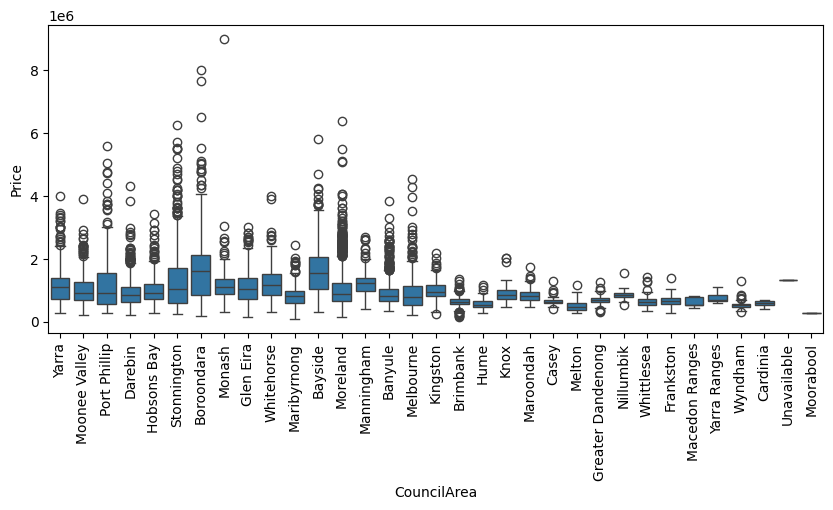

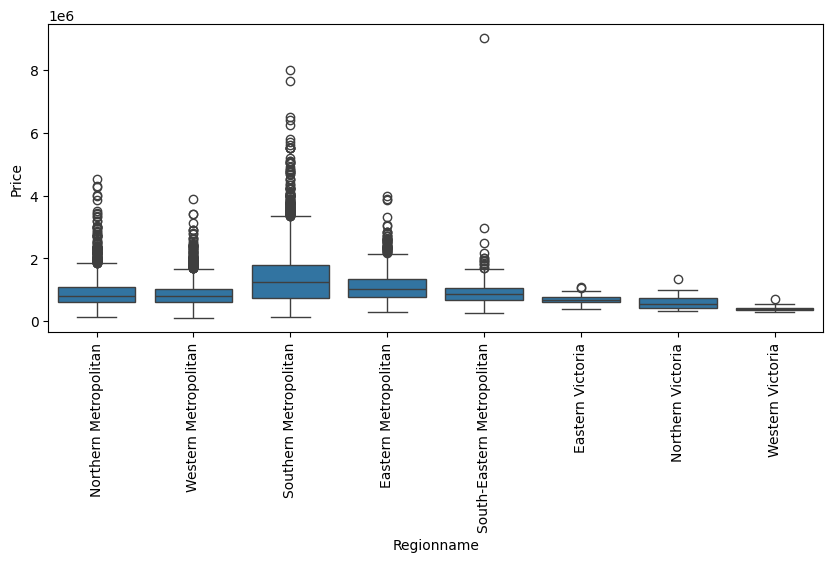

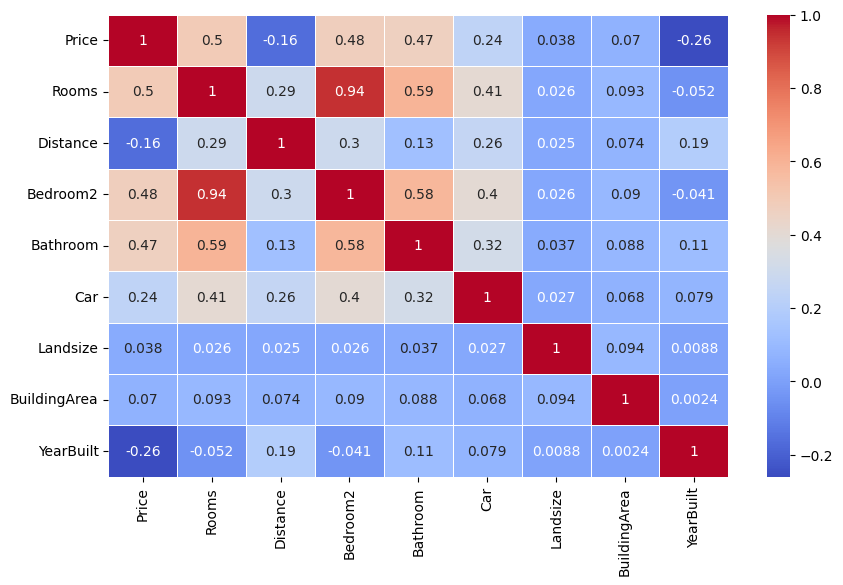

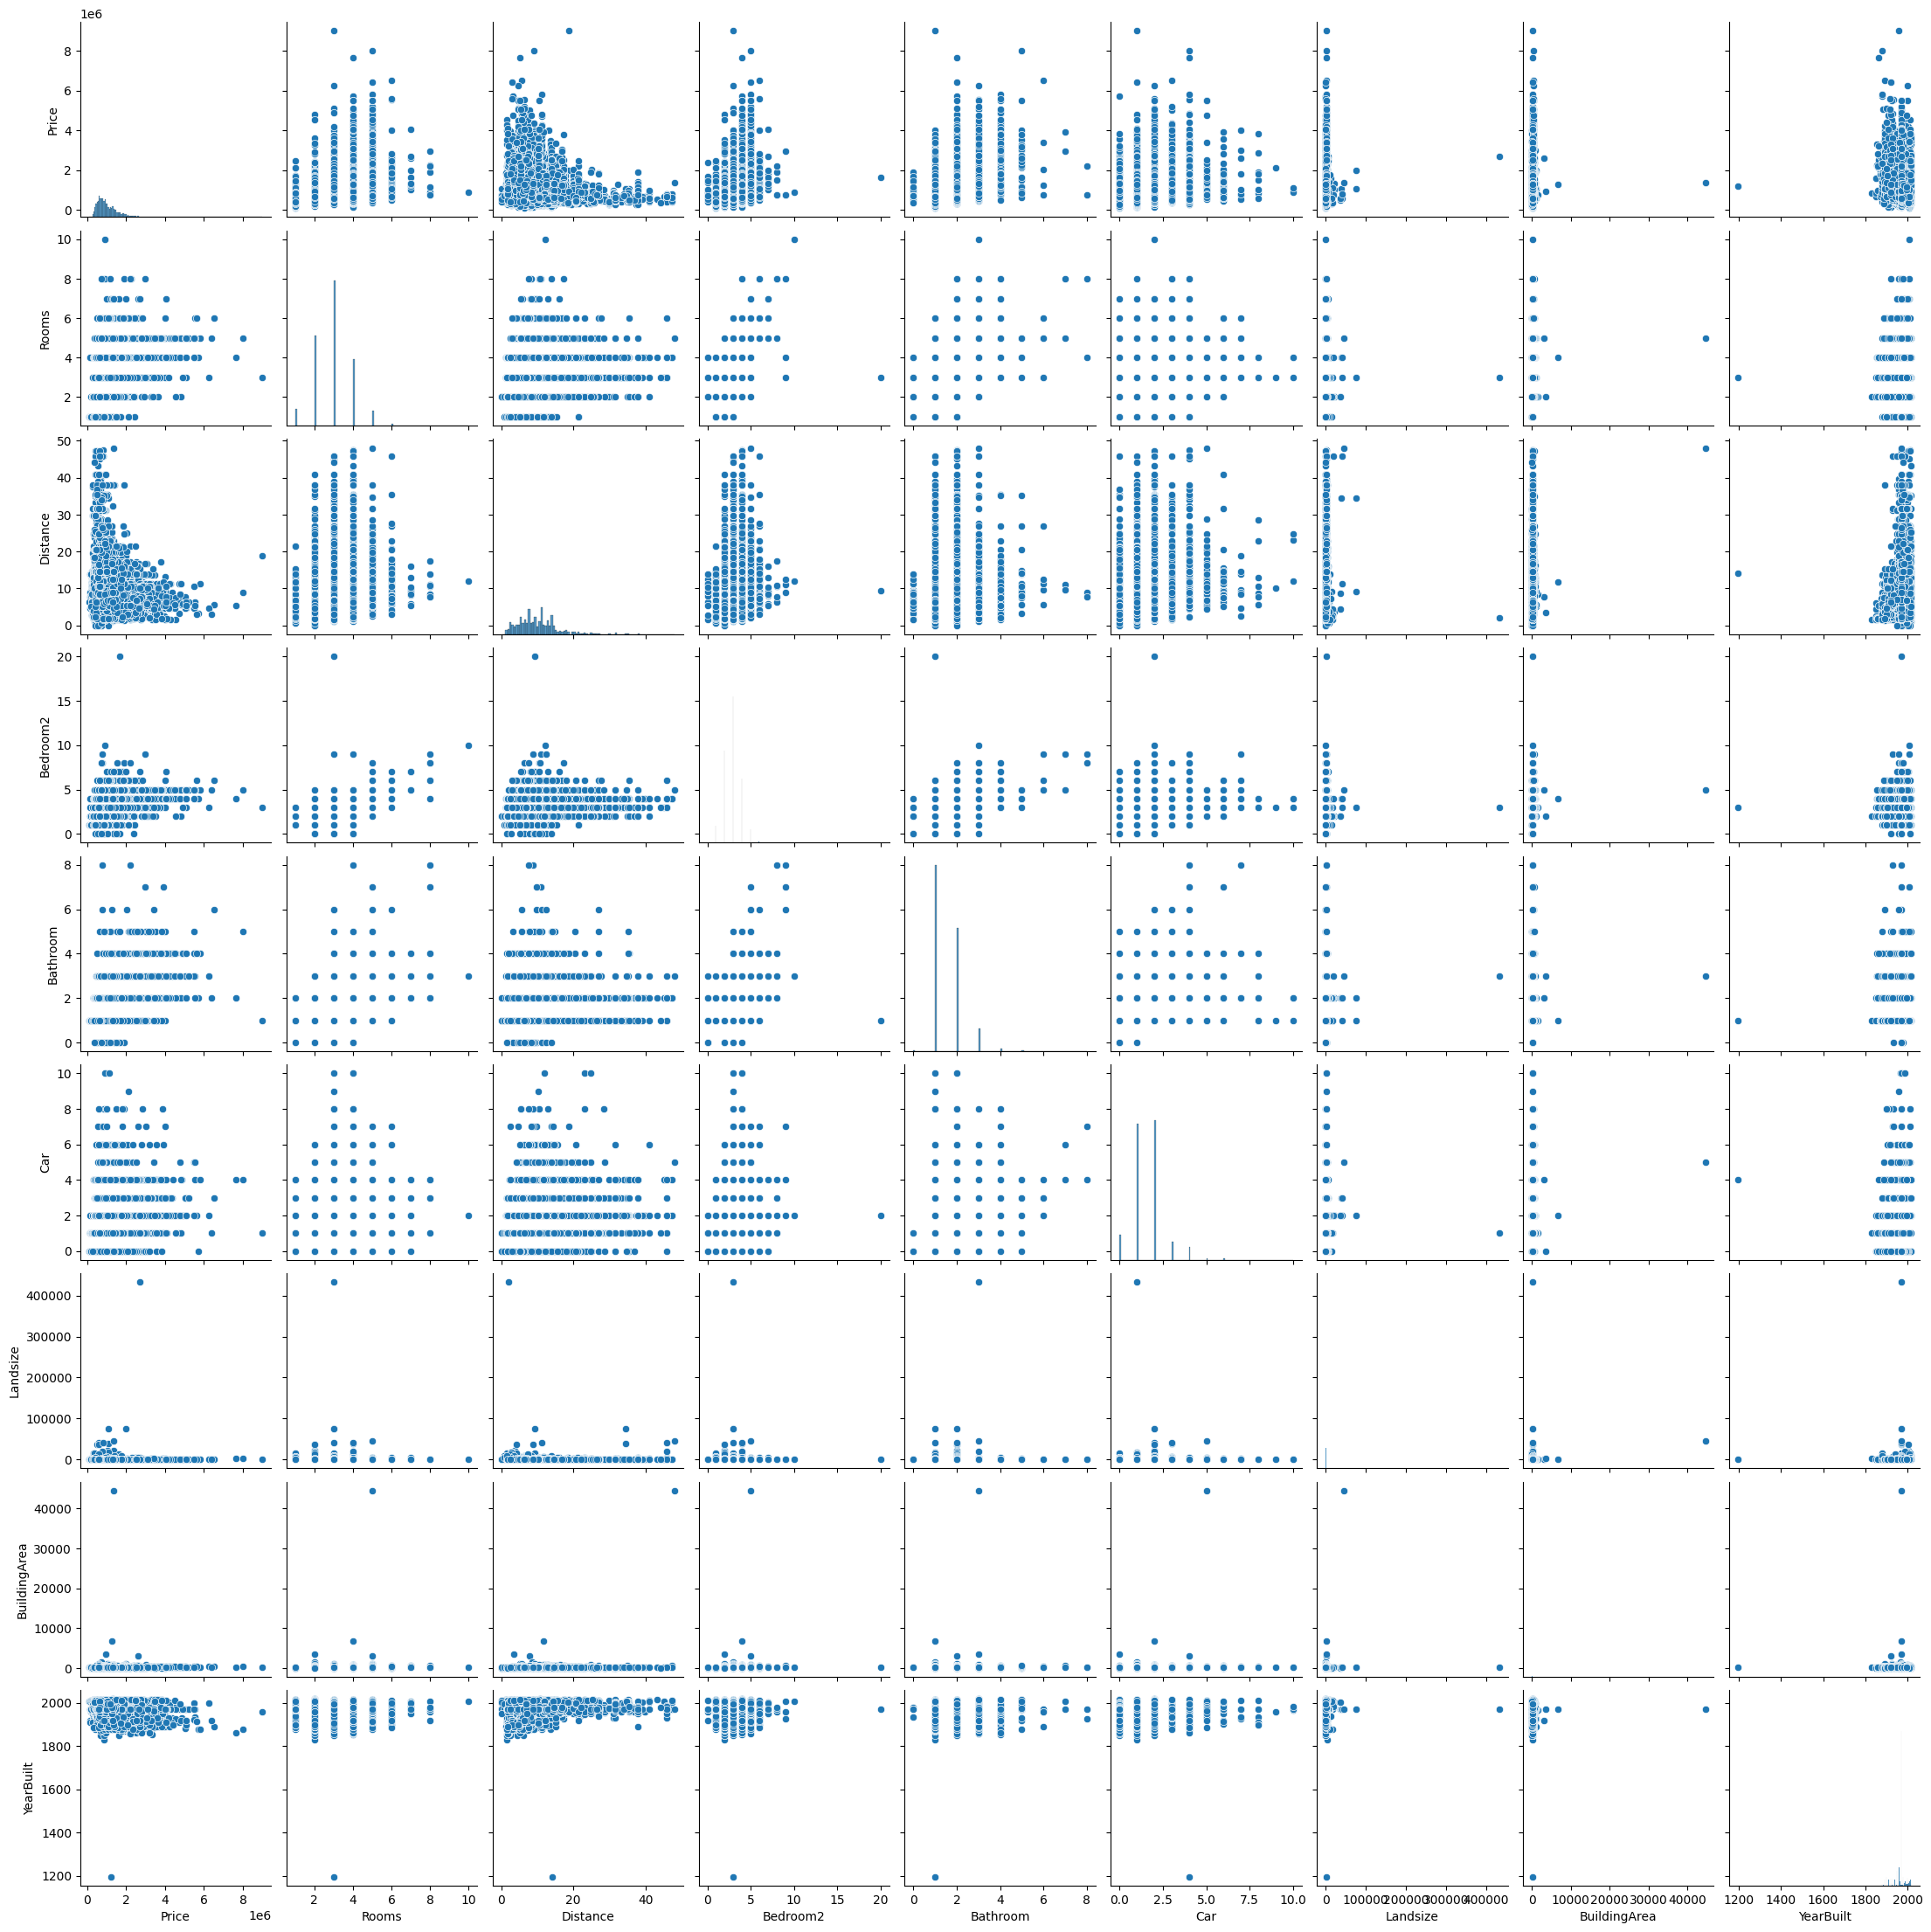

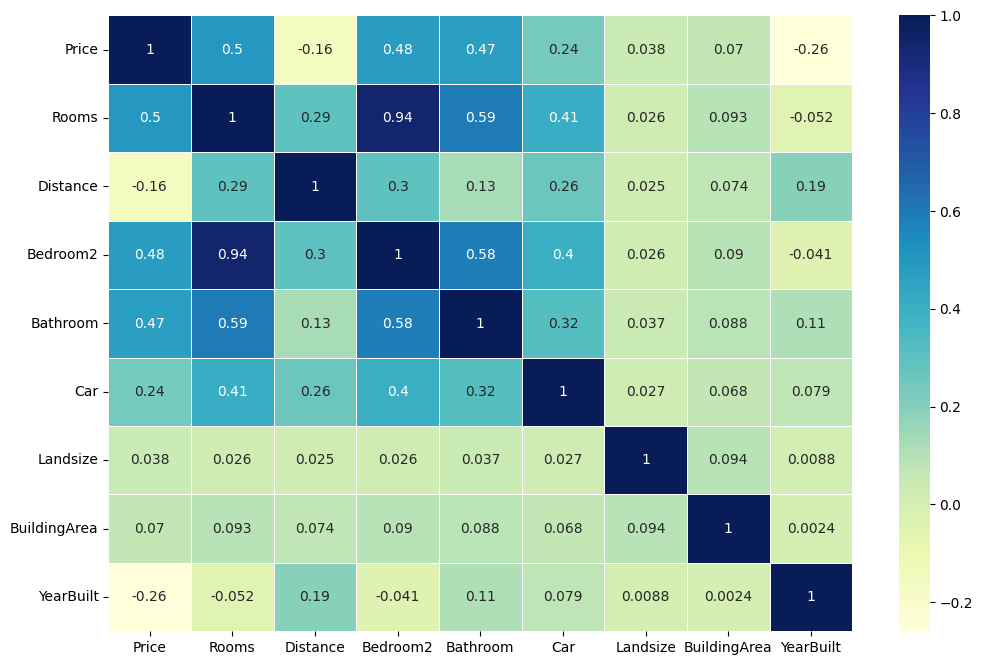

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Univariate Analysis (Numerical features: mean, median, mode, std, etc.)
numerical_features = ['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
for feature in numerical_features:
    print(f'\n--- {feature} ---')
    print(f'Mean: {data[feature].mean()}')
    print(f'Median: {data[feature].median()}')
    print(f'Mode: {data[feature].mode()[0]}')
    print(f'Standard Deviation: {data[feature].std()}')
    print(f'Min: {data[feature].min()}')
    print(f'Max: {data[feature].max()}')
    print(f'25th Percentile: {data[feature].quantile(0.25)}')
    print(f'75th Percentile: {data[feature].quantile(0.75)}')

data[numerical_features].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

categorical_features = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
for feature in categorical_features:
    print(f'\n--- {feature} ---')
    print(f'Mode: {data[feature].mode()[0]}')
    print(f'Unique Values: {data[feature].nunique()}')
    print(f'Value Counts:\n{data[feature].value_counts().head()}')

    plt.figure(figsize=(10, 4))
    sns.countplot(data[feature], order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

# Bivariate Analysis
for feature in numerical_features:
    if feature != 'Price':
        print(f'\n--- Price vs {feature} ---')
        print(data[['Price', feature]].corr())

        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[feature], y=data['Price'])
        plt.show()

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature], y=data['Price'])
    plt.xticks(rotation=90)
    plt.show()

correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Multivariate Analysis
sns.pairplot(data[numerical_features])
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.show()
